In [81]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import seaborn as sns

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [57]:
sacramento = pd.read_csv("./dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


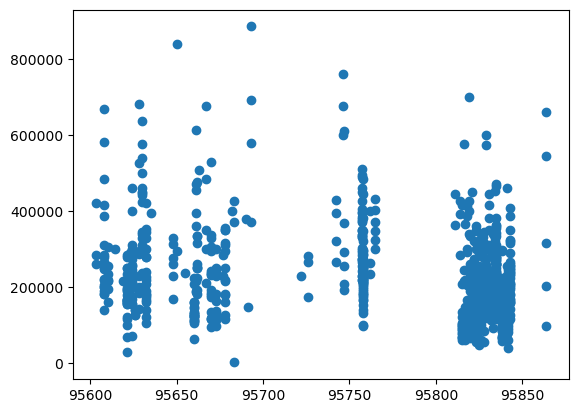

In [76]:
#ploting relationship

plt.scatter(sacramento["zip"], sacramento["price"], label = "Hose Size vs House Price")

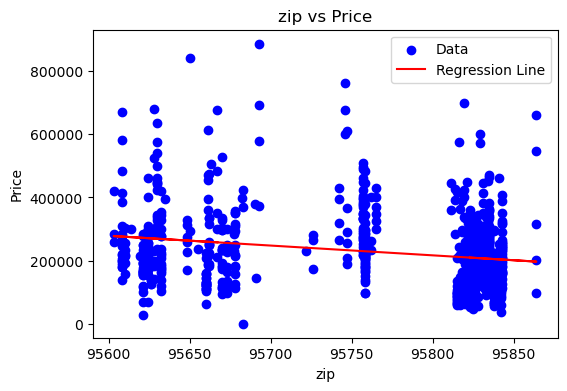

In [83]:
# Extract the feature column and target variable (mpg)
feature = sacramento[["zip"]]
X_feature = sacramento[["zip"]].values  # Extract as a 2D array
y = sacramento['price'].values  # Target variable (mpg)

    
    # Create a scatter plot for the feature against the target (mpg)
plt.figure(figsize=(6, 4))
plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
lm = LinearRegression()
lm.fit(X_feature, y)

    # Plot the regression line
plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
plt.xlabel("zip")
plt.ylabel('Price')
plt.title(f'zip vs Price')

    # Add a legend
plt.legend()

    # Show the plot
plt.show()

In [79]:
sacramento["zip"].unique()

array([95823, 95831, 95630, 95834, 95838, 95827, 95757, 95624, 95670,
       95673, 95632, 95815, 95825, 95819, 95693, 95818, 95833, 95816,
       95742, 95678, 95814, 95667, 95822, 95747, 95690, 95661, 95683,
       95832, 95603, 95663, 95648, 95835, 95811, 95635, 95758, 95608,
       95765, 95821, 95726, 95722, 95817, 95614, 95626, 95820, 95826,
       95843, 95677, 95682, 95660, 95864, 95762, 95650, 95824, 95628,
       95655, 95841, 95842, 95746, 95623, 95621, 95662, 95610, 95691,
       95619, 95828, 95829], dtype=int64)

In [78]:
model = smf.ols("price ~ zip", data = sacramento).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     41.14
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.41e-10
Time:                        15:03:00   Log-Likelihood:                -10653.
No. Observations:                 814   AIC:                         2.131e+04
Df Residuals:                     812   BIC:                         2.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.975e+07    4.6e+06      6.464      0.0

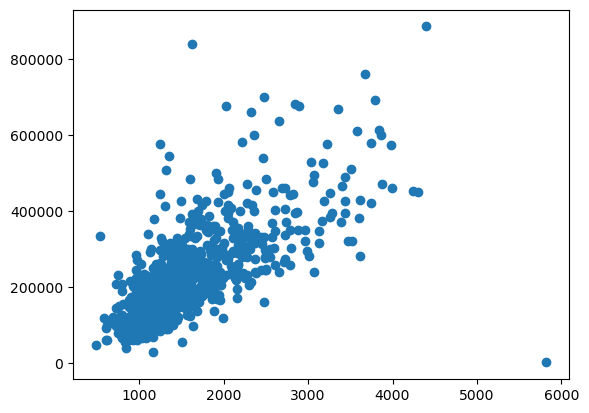

In [77]:
#ploting relationship

plt.scatter(sacramento["sq__ft"], sacramento["price"], label = "Hose Size vs House Price")

In [59]:
# model(response variable ~predictor, data).fit()

#simple linear regression

model = smf.ols("price ~ sq__ft", data = sacramento).fit()

In [60]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     753.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          7.67e-118
Time:                        12:59:47   Log-Likelihood:                -10406.
No. Observations:                 814   AIC:                         2.082e+04
Df Residuals:                     812   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.021e+04   7865.211      3.841      0.0

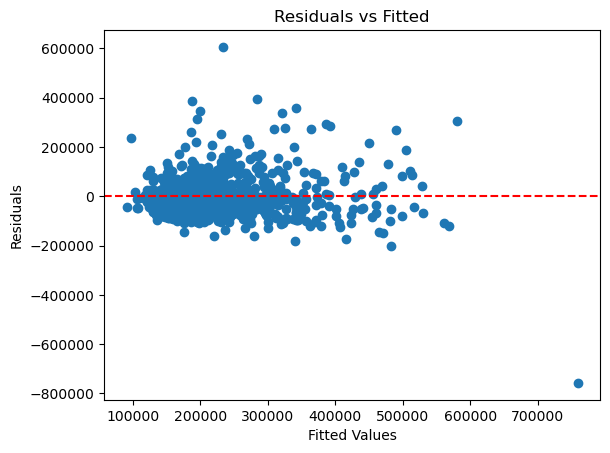

In [61]:
# Residual plots
fitted = model.fittedvalues
residuals = model.resid


# Homoscedasticity: Residuals vs. Fitted
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [62]:
#residuals are consistant. 

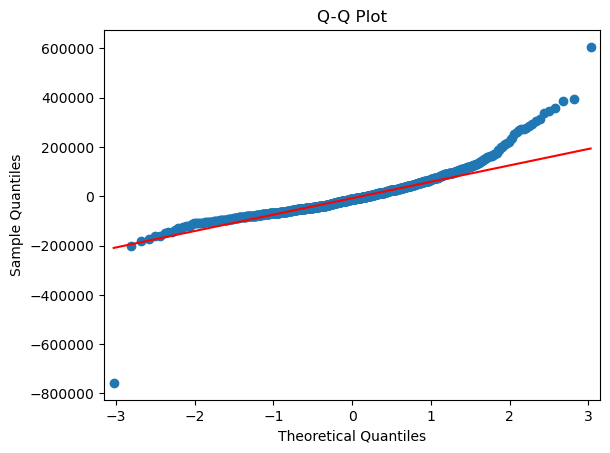

In [63]:
sm.qqplot(residuals, line = 'q')
plt.title('Q-Q Plot')
plt.show()

In [64]:
#aprox. normality

In [75]:
#Multivariable linear regression

multi_model = smf.ols("price ~ beds + sq__ft", data = sacramento).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     381.0
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          2.15e-117
Time:                        14:32:16   Log-Likelihood:                -10404.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     811   BIC:                         2.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.04e+04   1.19e+04      4.221      0.0

In [66]:
sacramento["type"].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [67]:
sacramento_encoded = pd.get_dummies(sacramento, columns=["type"], drop_first=True)

In [68]:
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606,False,True
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947,False,True
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259,False,True
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199,False,True
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730,False,True
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148,False,True
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160,False,True
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391,False,True


In [69]:
#rename columns to replace - with _ for ease

sacramento_encoded.columns = sacramento_encoded.columns.str.replace("-","_")
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi_Family,type_Residential
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606,False,True
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947,False,True
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259,False,True
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199,False,True
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730,False,True
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148,False,True
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160,False,True
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391,False,True


In [70]:
#multivariable with category model
multi_cat_model = smf.ols("price ~ sq__ft + beds + type_Multi_Family + type_Residential", data = sacramento_encoded).fit()

In [71]:
print(multi_cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          5.87e-117
Time:                        12:59:48   Log-Likelihood:                -10399.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     809   BIC:                         2.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [72]:
#multivariable with category model
multi_cat_model_02 = smf.ols("price ~ sq__ft*type_Multi_Family + sq__ft*type_Residential", data = sacramento_encoded).fit()

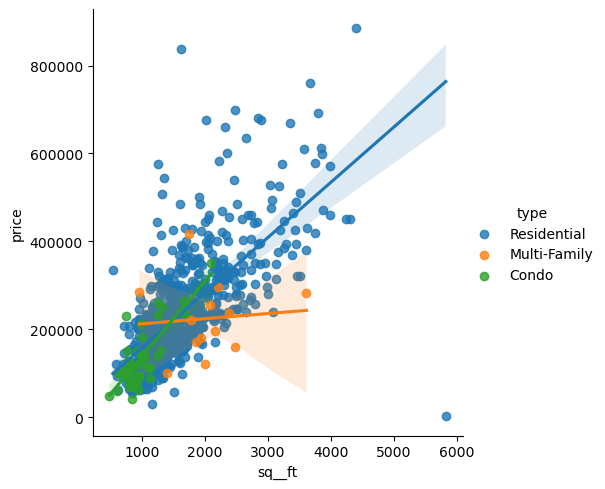

In [73]:
import seaborn
seaborn.lmplot(x="sq__ft", 
               y="price", 
               hue="type", 
               data=sacramento)